In [128]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
from datetime import datetime

In [161]:
node_list = [f'node_{i}' for i in range(1,9)]

timestamp='1633'

df0 = pd.read_csv(f'../results/2023-11-01_{timestamp}_compromised/node_0.csv')

for n in node_list:
    print(n)
    df = pd.read_csv(f'../results/2023-11-01_{timestamp}_compromised/{n}.csv')
    if n=='node_1':
        df0 = df0.merge(df, left_on='time', right_on='time',
             suffixes = ('', f'_{n}'))
    elif n=='node_2':
        df0 = df0.merge(df, left_on='time', right_on='time',
             suffixes = ('', f'_{n}'))
    else:    
        df0 = df0.merge(df, left_on='time', right_on='time',
             suffixes = ('', f'_{n}'))
    

node_1
node_2
node_3
node_4
node_5
node_6
node_7
node_8


In [162]:
df0

,Unnamed: 0,time,packet_rate,bandwidth,response_time,flagged_malicious,fuzzy_compromised_value,fuzzy_compromised_category,compromised_truth,Unnamed: 0_node_1,...,fuzzy_compromised_category_node_7,compromised_truth_node_7,Unnamed: 0_node_8,packet_rate_node_8,bandwidth_node_8,response_time_node_8,flagged_malicious_node_8,fuzzy_compromised_value_node_8,fuzzy_compromised_category_node_8,compromised_truth_node_8
0,0,-1,0.922561,28.767274,125.603298,0,0.000000,0,0,0,...,0,0,0,0.905246,29.416132,103.457868,0,0.000000,0,0
1,1,0,0.910301,28.628556,118.384004,0,4.542451,0,0,1,...,0,0,1,0.885459,29.970362,155.763220,1,5.079206,0,0
2,2,1,0.923698,27.270706,139.480067,0,3.272898,0,0,2,...,0,0,2,0.903278,35.627369,106.012146,0,4.313832,0,0
3,3,2,0.906053,34.481009,112.426992,0,4.427143,0,0,3,...,0,0,3,0.905941,28.746147,120.857762,0,4.568156,0,0
4,4,3,0.907900,29.392238,134.293103,0,4.776592,0,0,4,...,0,0,4,0.900050,33.439063,151.167528,0,5.016930,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,195,0.841715,25.230066,281.728052,1,6.581313,1,1,196,...,1,1,196,0.830290,24.503375,339.011954,1,8.883460,1,1
197,197,196,0.840101,24.284231,409.511519,1,7.151909,1,1,197,...,1,1,197,0.836118,25.182363,382.282206,1,7.544440,1,1
198,198,197,0.857945,22.646140,311.045091,1,6.729917,1,1,198,...,1,1,198,0.845374,24.844929,330.229895,1,6.899230,1,1
199,199,198,0.853852,27.324425,392.610959,1,6.710858,1,1,199,...,1,1,199,0.804692,30.432552,360.368206,1,9.000000,1,1


In [163]:
time_vals = []
compromised_truth_total = []
fuzzy_cat = []
fuzzy_val = []
flagged_tot = []
node_list = ['']


for i in range(1, 9):
    node_list.append(f'node_{i}')

for r in df0.iterrows():
    # Get the time
    t = r[1].time 
    time_vals.append(t)
    
    temp_total = 0 
    flagged_total = 0
    fuzzy_compromised_total = 0
    
    for n in node_list:
        if n=='':
            comp = r[1][f'compromised_truth{n}']
            flagged_t = r[1][f'flagged_malicious{n}']
            fuzzc = r[1][f'fuzzy_compromised_category{n}']
            if fuzzc < 0:
                fuzzc = 0
        else:
            comp = r[1][f'compromised_truth_{n}']
            flagged_t = r[1][f'flagged_malicious_{n}']
            fuzzc = r[1][f'fuzzy_compromised_category_{n}']  
        temp_total+= comp
        flagged_total += flagged_t
        fuzzy_compromised_total += fuzzc
        
    compromised_truth_total.append(temp_total)
    flagged_tot.append(flagged_total)
    fuzzy_cat.append(fuzzy_compromised_total)


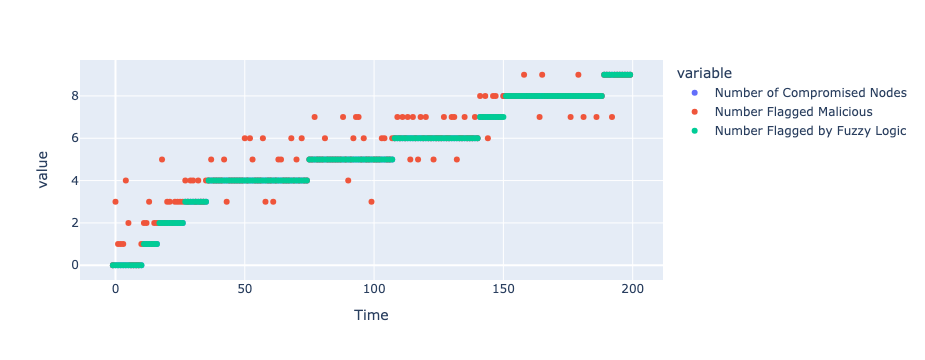

In [164]:
c_df = pd.DataFrame({'Time': time_vals,
                    'Number of Compromised Nodes': compromised_truth_total,
                    'Number Flagged Malicious': flagged_tot,
                    'Number Flagged by Fuzzy Logic': fuzzy_cat})
px.scatter(c_df, x='Time', 
          y= ['Number of Compromised Nodes', 
              'Number Flagged Malicious', 
             'Number Flagged by Fuzzy Logic'])


In [132]:
datetime.now().strftime("%Y-%m-%d_%H%M")

'2023-11-01_1615'

In [147]:
df0.fuzzy_compromised_value.max()

9.0

In [152]:
df0

,Unnamed: 0,time,packet_rate,bandwidth,response_time,flagged_malicious,fuzzy_compromised_value,fuzzy_compromised_category,compromised_truth,Unnamed: 0_node_1,...,fuzzy_compromised_category_node_7,compromised_truth_node_7,Unnamed: 0_node_8,packet_rate_node_8,bandwidth_node_8,response_time_node_8,flagged_malicious_node_8,fuzzy_compromised_value_node_8,fuzzy_compromised_category_node_8,compromised_truth_node_8
0,0,-1,0.912890,30.704355,154.555300,0,0.000000,0,0,0,...,0,0,0,0.905181,32.205852,130.005942,0,0.000000,0,0
1,1,0,0.896592,30.199064,124.144238,0,4.620835,0,0,1,...,0,0,1,0.886559,28.761518,140.375308,1,4.865589,0,0
2,2,1,0.931472,32.697134,114.463573,0,1.456806,0,0,2,...,0,0,2,0.904464,27.051402,172.578658,1,5.222503,0,0
3,3,2,0.888429,28.517692,104.587982,0,4.579136,0,0,3,...,0,0,3,0.902414,29.079259,131.486028,1,4.734478,0,0
4,4,3,0.931390,32.525309,113.968428,0,1.455790,0,0,4,...,0,0,4,0.906567,27.874149,132.895633,0,4.781591,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,195,0.808520,25.162582,425.906505,1,9.000000,1,1,196,...,1,1,196,0.896292,25.096492,152.184736,1,5.529663,0,0
197,197,196,0.818971,27.833300,289.243713,1,7.899741,1,1,197,...,1,1,197,0.921594,30.186914,162.126848,0,3.776147,0,0
198,198,197,0.820979,25.541318,340.513550,1,9.000000,1,1,198,...,1,1,198,0.904637,31.404771,88.366617,0,3.976917,0,0
199,199,198,0.844701,23.816892,417.327587,1,6.920966,1,1,199,...,1,1,199,0.899484,29.612538,106.856521,0,4.328963,0,0
